In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BTP data.csv", sep='\t')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [3]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

In [4]:
data_1=df.copy()
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
ans = [i for i in data_1.iloc[:,0:126] if  'A' in i]

In [5]:
data_1=df[ans]
df=data_1

In [6]:
df

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39771,3,4,3,4,3,4,4,4,3,4,...,3,4,3,3,3,4,3,3,3,4
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


In [7]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= df.filter(Dep)
stress = df.filter(Stress)
anxiety = df.filter(Anx)

In [8]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

Depression Set

In [9]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,41
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,38
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,53
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,30
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,46


In [10]:
def condition(x):
    if x<=18:
        return 'Normal'
    if  19<=x<=28:
        return 'Mild'
    if 29<=x<=38:
        return 'Moderate'
    if 39<=x<=48:
        return 'Severe'
    if x>48:
        return 'Extremely Severe'

depression['Condition']=depression['Total_Count'].apply(condition)
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,Condition
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,41,Severe
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,38,Moderate
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,53,Extremely Severe
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,30,Moderate
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,46,Severe


In [11]:
occur=depression.groupby(['Condition']).size()

In [12]:
occur

Condition
Extremely Severe    7368
Mild                9373
Moderate            9715
Normal              4318
Severe              9001
dtype: int64

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People Condition of Depression Level')

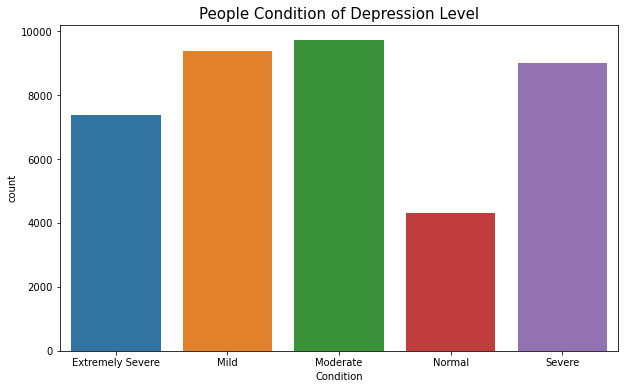

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(depression.sort_values('Condition').Condition)
plt.title('People Condition of Depression Level',fontsize=15)

In [14]:
def condition(x):
    if x<=18:
        return 0
    if  19<=x<=28:
        return 1
    if 29<=x<=38:
        return 2
    if 39<=x<=48:
        return 3
    if x>48:
        return 4
    
depression['Condition']=depression['Total_Count'].apply(condition)
depression=depression.drop(columns=['Total_Count'])

In [15]:
depression

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Condition
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,3
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,2
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,4
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,2
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,3,3,4,4,3,4,4,3,3,4,4,4,4,3,4
39771,3,3,4,4,4,3,4,4,4,4,4,3,4,4,4
39772,2,1,1,2,1,1,1,2,1,2,1,1,1,1,0
39773,2,3,1,4,1,2,2,2,3,2,2,1,2,3,2


Stress Set

In [16]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,4,4,4,4,4,4,4,4,4,4,4,2,4,4,54
1,4,4,4,2,2,4,2,3,3,3,3,3,2,2,41
2,3,3,3,2,1,1,2,3,2,2,3,1,3,2,31
3,2,3,2,2,1,4,1,1,4,3,1,2,1,3,30
4,2,2,4,2,4,4,4,3,2,2,4,4,3,3,43


In [17]:
def condition(x):
    if x<=18:
        return 'Normal'
    if  19<=x<=28:
        return 'Mild'
    if 29<=x<=38:
        return 'Moderate'
    if 39<=x<=48:
        return 'Severe'
    if x>48:
        return 'Extremely Severe'

stress['Condition']=stress['Total_Count'].apply(condition)
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,Condition
0,4,4,4,4,4,4,4,4,4,4,4,2,4,4,54,Extremely Severe
1,4,4,4,2,2,4,2,3,3,3,3,3,2,2,41,Severe
2,3,3,3,2,1,1,2,3,2,2,3,1,3,2,31,Moderate
3,2,3,2,2,1,4,1,1,4,3,1,2,1,3,30,Moderate
4,2,2,4,2,4,4,4,3,2,2,4,4,3,3,43,Severe


In [18]:
occur=stress.groupby(['Condition']).size()
occur

Condition
Extremely Severe     4906
Mild                 9562
Moderate            12416
Normal               2238
Severe              10653
dtype: int64

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People Condition of Stress Level')

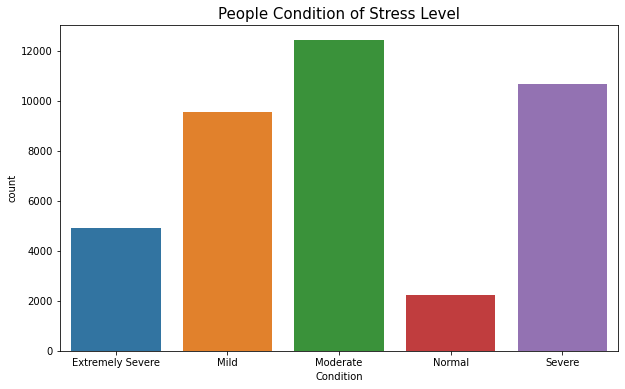

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(stress.sort_values('Condition').Condition)
plt.title('People Condition of Stress Level',fontsize=15)

In [20]:
def condition(x):
    if x<=18:
        return 0
    if  19<=x<=28:
        return 1
    if 29<=x<=38:
        return 2
    if 39<=x<=48:
        return 3
    if x>48:
        return 4
    
stress['Condition']=stress['Total_Count'].apply(condition)
stress=stress.drop(columns=['Total_Count'])

In [21]:
stress

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Condition
0,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4
1,4,4,4,2,2,4,2,3,3,3,3,3,2,2,3
2,3,3,3,2,1,1,2,3,2,2,3,1,3,2,2
3,2,3,2,2,1,4,1,1,4,3,1,2,1,3,2
4,2,2,4,2,4,4,4,3,2,2,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,2,2,2,2,3,2,3,1,2,1,2,2
39771,3,4,4,4,4,4,3,4,3,3,3,3,3,3,3
39772,2,1,1,1,1,1,1,1,2,2,1,2,1,2,1
39773,3,3,4,3,3,4,3,4,4,3,3,4,3,3,3


Anxiety Set

In [22]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,4,4,4,2,4,3,3,4,4,3,2,4,3,4,48
1,1,3,3,3,3,1,1,1,2,4,3,3,1,2,31
2,1,1,1,2,4,2,1,2,2,1,2,4,2,1,26
3,3,1,4,3,2,1,2,1,1,1,3,1,4,4,31
4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,54


In [23]:
def condition(x):
    if x<=18:
        return 'Normal'
    if  19<=x<=28:
        return 'Mild'
    if 29<=x<=38:
        return 'Moderate'
    if 39<=x<=48:
        return 'Severe'
    if x>48:
        return 'Extremely Severe'

anxiety['Condition']=anxiety['Total_Count'].apply(condition)
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,Condition
0,4,4,4,2,4,3,3,4,4,3,2,4,3,4,48,Severe
1,1,3,3,3,3,1,1,1,2,4,3,3,1,2,31,Moderate
2,1,1,1,2,4,2,1,2,2,1,2,4,2,1,26,Mild
3,3,1,4,3,2,1,2,1,1,1,3,1,4,4,31,Moderate
4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,54,Extremely Severe


In [24]:
occur=anxiety.groupby(['Condition']).size()
occur

Condition
Extremely Severe     2117
Mild                13938
Moderate            11439
Normal               5602
Severe               6679
dtype: int64

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People Condition of Anxiety Level')

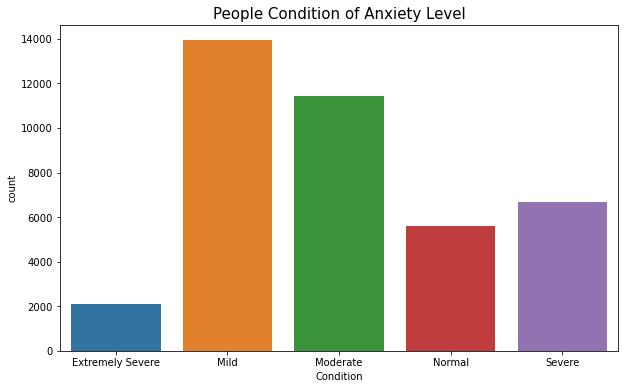

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(anxiety.sort_values('Condition').Condition)
plt.title('People Condition of Anxiety Level',fontsize=15)

In [26]:
def condition(x):
    if x<=18:
        return 0
    if  19<=x<=28:
        return 1
    if 29<=x<=38:
        return 2
    if 39<=x<=48:
        return 3
    if x>48:
        return 4
    
anxiety['Condition']=anxiety['Total_Count'].apply(condition)
anxiety=anxiety.drop(columns=['Total_Count'])

In [27]:
anxiety

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Condition
0,4,4,4,2,4,3,3,4,4,3,2,4,3,4,3
1,1,3,3,3,3,1,1,1,2,4,3,3,1,2,2
2,1,1,1,2,4,2,1,2,2,1,2,4,2,1,1
3,3,1,4,3,2,1,2,1,1,1,3,1,4,4,2
4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,1,2,1,1,1,4,3,1,2,2,2,2,3,1,1
39771,4,4,4,3,4,4,4,3,3,3,3,3,3,3,3
39772,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0
39773,1,2,3,3,1,1,2,1,1,3,1,2,2,4,1


In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

# Model for Depression

In [29]:
scaler=MinMaxScaler()
X=depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']]
y=depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (25853, 14) (25853, 1)
Test Set: (13922, 14) (13922, 1)


Random Forest

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.951
F1_Score: 0.951
Recall_Score: 0.951
Precision_Score: 0.951


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: Dat

Cross Validation Score: 0.95
              precision    recall  f1-score   support

           0     0.9435    0.9735    0.9583      1474
           1     0.9626    0.9448    0.9536      3352
           2     0.9405    0.9455    0.9430      3412
           3     0.9482    0.9360    0.9420      3204
           4     0.9603    0.9750    0.9676      2480

    accuracy                         0.9514     13922
   macro avg     0.9510    0.9550    0.9529     13922
weighted avg     0.9514    0.9514    0.9513     13922



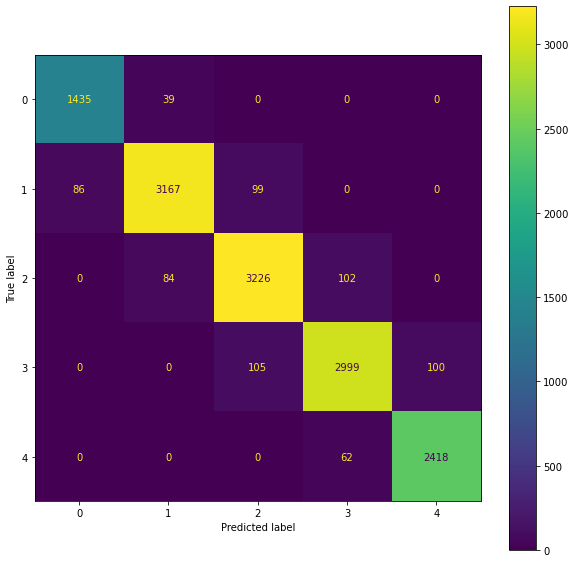

In [31]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

Decision Trees

Accuracy: 0.847
F1_Score: 0.846
Recall_Score: 0.847
Precision_Score: 0.846
Cross Validation Score: 0.845
              precision    recall  f1-score   support

           0     0.8789    0.9206    0.8993      1474
           1     0.8522    0.8616    0.8568      3352
           2     0.7999    0.8048    0.8023      3412
           3     0.8358    0.7896    0.8121      3204
           4     0.8956    0.9133    0.9044      2480

    accuracy                         0.8466     13922
   macro avg     0.8525    0.8580    0.8550     13922
weighted avg     0.8462    0.8466    0.8461     13922



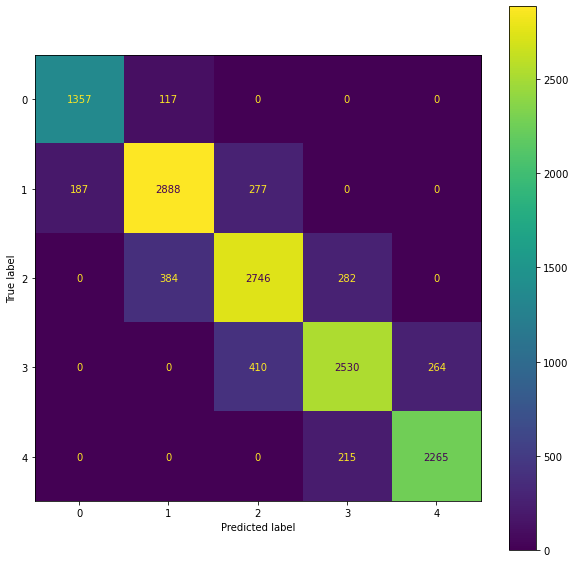

In [32]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

Gaussian Naive Bayes

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.924
F1_Score: 0.924
Recall_Score: 0.924
Precision_Score: 0.925


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Cross Validation Score: 0.919
              precision    recall  f1-score   support

           0     0.8967    0.9132    0.9049      1474
           1     0.9254    0.9024    0.9138      3352
           2     0.9249    0.9390    0.9319      3412
           3     0.8985    0.9535    0.9252      3204
           4     0.9733    0.8980    0.9341      2480

    accuracy                         0.9235     13922
   macro avg     0.9238    0.9212    0.9220     13922
weighted avg     0.9246    0.9235    0.9235     13922



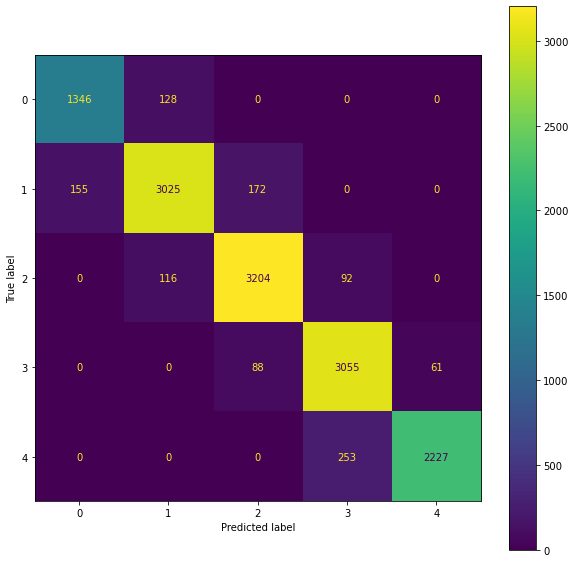

In [33]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

Nearest Neighbour

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.922
F1_Score: 0.922
Recall_Score: 0.922
Precision_Score: 0.927


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Cross Validation Score: 0.926
              precision    recall  f1-score   support

           0     0.8267    0.9939    0.9026      1474
           1     0.9639    0.8672    0.9130      3352
           2     0.9222    0.9417    0.9318      3412
           3     0.9633    0.8674    0.9128      3204
           4     0.8944    0.9972    0.9430      2480

    accuracy                         0.9221     13922
   macro avg     0.9141    0.9335    0.9207     13922
weighted avg     0.9266    0.9221    0.9218     13922



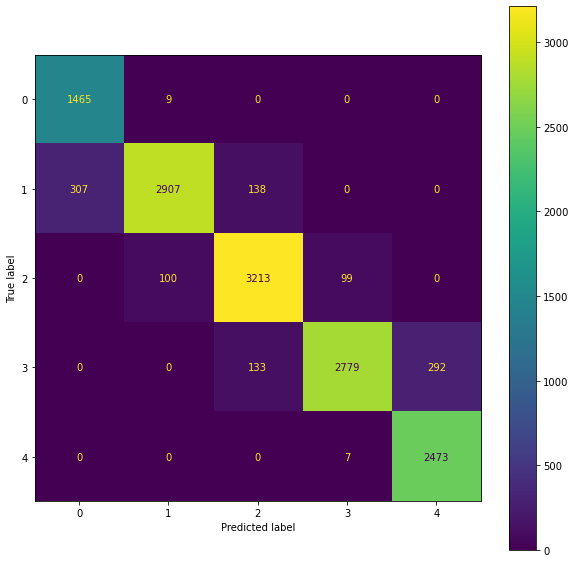

In [34]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

SVM

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Cross Validation Score: 1.0
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1474
           1     1.0000    1.0000    1.0000      3352
           2     1.0000    1.0000    1.0000      3412
           3     1.0000    1.0000    1.0000      3204
           4     1.0000    1.0000    1.0000      2480

    accuracy                         1.0000     13922
   macro avg     1.0000    1.0000    1.0000     13922
weighted avg     1.0000    1.0000    1.0000     13922



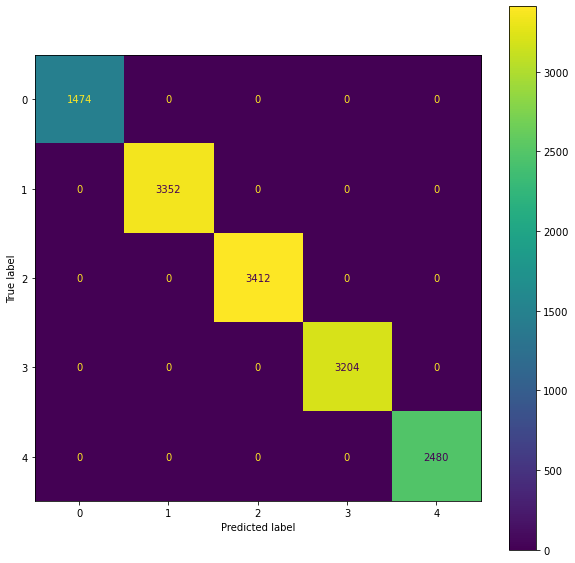

In [35]:
from sklearn.svm import SVC
svm=SVC(C=10,gamma=0.2,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm,X_test_scaled,y_test,ax=ax)

In [36]:
pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\91897\anaconda3\envs\py37\python.exe -m pip install --upgrade pip' command.


In [37]:
import xgboost as xgb

In [57]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_scaled,y_train)
predictions = xgb_classifier.predict(X_test_scaled)

In [64]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))
print('F1_Score:',f1_score(y_test,predictions,average='weighted'))
print('Recall_Score:',recall_score(y_test,predictions,average='weighted'))
print('Precision_Score:',precision_score(y_test,predictions,average='weighted'))

Accuracy of Model:: 0.9716994684671743
F1_Score: 0.9716699232480379
Recall_Score: 0.9716994684671743
Precision_Score: 0.9716902165763796


In [65]:
Accuracy_xg = accuracy_score(y_test,predictions)

In [66]:
classifier=['Random Forest', 'Decision Trees', 'Gaussian Naive Bayes', 'Nearest Neighbour', 'XG Boost']
accuracy=[Acc_ran,Acc_dt,Acc_gb,Acc_knn,Accuracy_xg]
df1 = pd.DataFrame(classifier, columns=['Classifier'])

In [67]:
df1['accuracy']=accuracy

<AxesSubplot:xlabel='accuracy', ylabel='Classifier'>

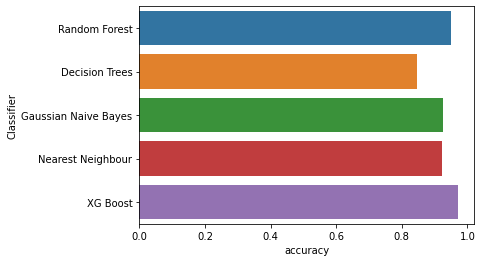

In [80]:
sns.barplot(y = 'Classifier',
            x = 'accuracy',
            data = df1,orient='h')


# Model for Stress

In [85]:
scaler=MinMaxScaler()
X=stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']]
y=stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (25853, 14) (25853, 1)
Test Set: (13922, 14) (13922, 1)


Random Forest

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.944
F1_Score: 0.944
Recall_Score: 0.944
Precision_Score: 0.944


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: Dat

Cross Validation Score: 0.944
              precision    recall  f1-score   support

           0     0.9558    0.9304    0.9429       790
           1     0.9529    0.9468    0.9499      3401
           2     0.9362    0.9431    0.9397      4342
           3     0.9340    0.9483    0.9411      3730
           4     0.9622    0.9355    0.9487      1659

    accuracy                         0.9438     13922
   macro avg     0.9482    0.9408    0.9444     13922
weighted avg     0.9439    0.9438    0.9438     13922



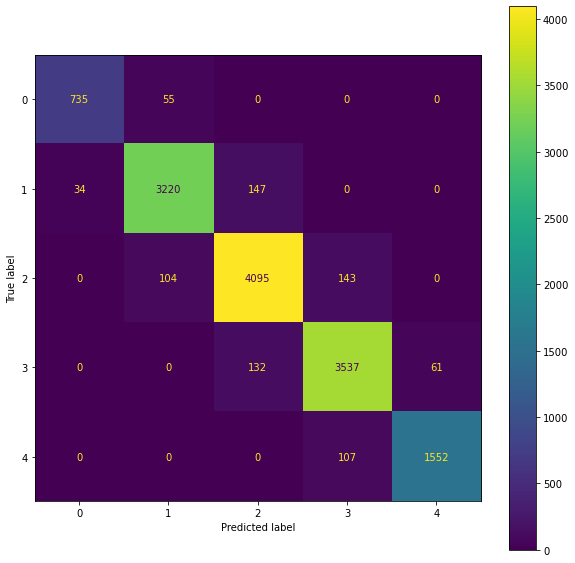

In [87]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

Decision Tree

Accuracy: 0.821
F1_Score: 0.821
Recall_Score: 0.821
Precision_Score: 0.821
Cross Validation Score: 0.819
              precision    recall  f1-score   support

           0     0.8410    0.8367    0.8388       790
           1     0.8322    0.8603    0.8460      3401
           2     0.7995    0.7936    0.7966      4342
           3     0.8181    0.7936    0.8057      3730
           4     0.8493    0.8662    0.8577      1659

    accuracy                         0.8210     13922
   macro avg     0.8280    0.8301    0.8290     13922
weighted avg     0.8208    0.8210    0.8208     13922



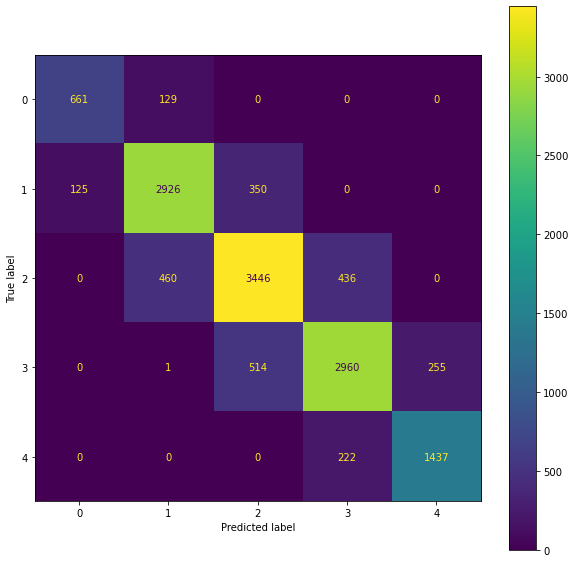

In [88]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

Gaussian Naive Bayes

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.926
F1_Score: 0.926
Recall_Score: 0.926
Precision_Score: 0.927


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Cross Validation Score: 0.928
              precision    recall  f1-score   support

           0     0.9111    0.9468    0.9286       790
           1     0.9407    0.9047    0.9224      3401
           2     0.9215    0.9348    0.9281      4342
           3     0.9163    0.9507    0.9332      3730
           4     0.9428    0.8837    0.9123      1659

    accuracy                         0.9263     13922
   macro avg     0.9265    0.9241    0.9249     13922
weighted avg     0.9267    0.9263    0.9262     13922



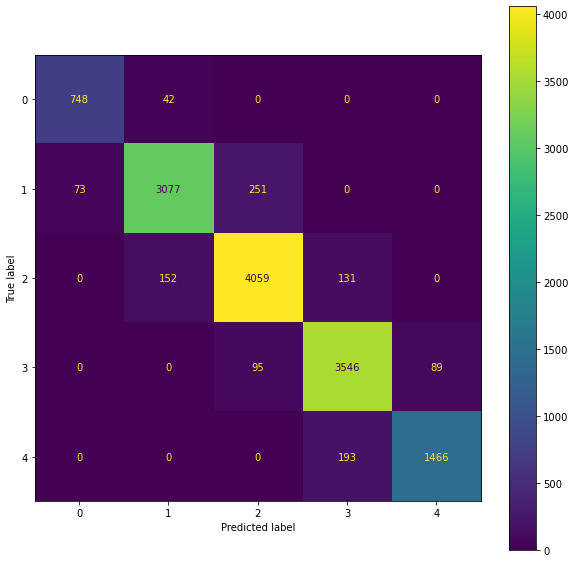

In [89]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

Nearest Neighbour

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.925
F1_Score: 0.925
Recall_Score: 0.925
Precision_Score: 0.929


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Cross Validation Score: 0.924
              precision    recall  f1-score   support

           0     0.7959    0.9924    0.8834       790
           1     0.9700    0.8833    0.9246      3401
           2     0.9195    0.9498    0.9344      4342
           3     0.9565    0.8912    0.9227      3730
           4     0.8718    0.9879    0.9263      1659

    accuracy                         0.9248     13922
   macro avg     0.9028    0.9409    0.9183     13922
weighted avg     0.9291    0.9248    0.9250     13922



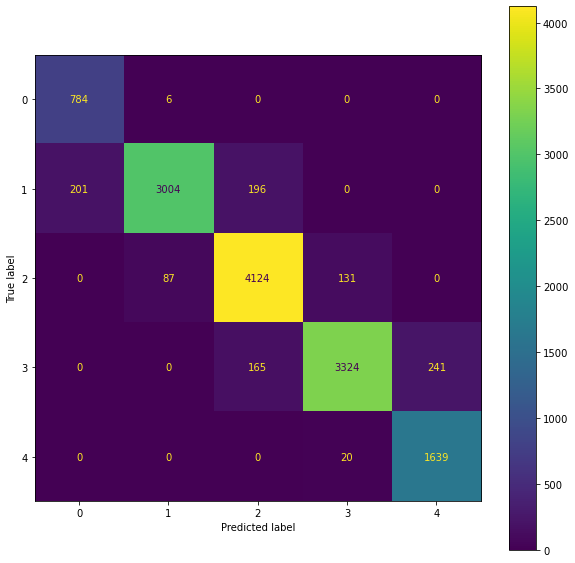

In [90]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

XG Boost

In [91]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_scaled,y_train)
predictions = xgb_classifier.predict(X_test_scaled)

print("Accuracy of Model::",accuracy_score(y_test,predictions))
print('F1_Score:',f1_score(y_test,predictions,average='weighted'))
print('Recall_Score:',recall_score(y_test,predictions,average='weighted'))
print('Precision_Score:',precision_score(y_test,predictions,average='weighted'))

Accuracy_xg = accuracy_score(y_test,predictions)

Accuracy of Model:: 0.964947565005028
F1_Score: 0.9649451671330705
Recall_Score: 0.964947565005028
Precision_Score: 0.9649605284528926


In [92]:
classifier=['Random Forest', 'Decision Trees', 'Gaussian Naive Bayes', 'Nearest Neighbour', 'XG Boost']
accuracy=[Acc_ran,Acc_dt,Acc_gb,Acc_knn,Accuracy_xg]
df2 = pd.DataFrame(classifier, columns=['Classifier'])
df2['accuracy']=accuracy

<AxesSubplot:xlabel='accuracy', ylabel='Classifier'>

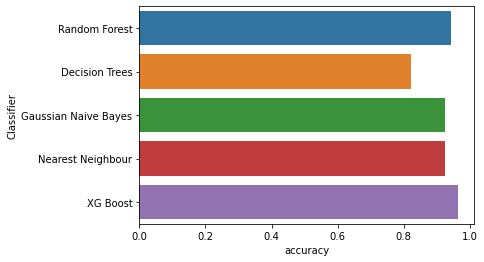

In [93]:
sns.barplot(y = 'Classifier',
            x = 'accuracy',
            data = df2,orient='h')

# Model for Anxiety 

In [96]:
scaler=MinMaxScaler()
X=anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']]
y=anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.942
F1_Score: 0.942
Recall_Score: 0.942
Precision_Score: 0.942


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:593: Dat

Cross Validation Score: 0.939
              precision    recall  f1-score   support

           0     0.9536    0.9654    0.9595      1939
           1     0.9467    0.9594    0.9530      4945
           2     0.9241    0.9369    0.9305      3978
           3     0.9447    0.9101    0.9271      2348
           4     0.9770    0.8961    0.9348       712

    accuracy                         0.9422     13922
   macro avg     0.9493    0.9336    0.9410     13922
weighted avg     0.9424    0.9422    0.9422     13922



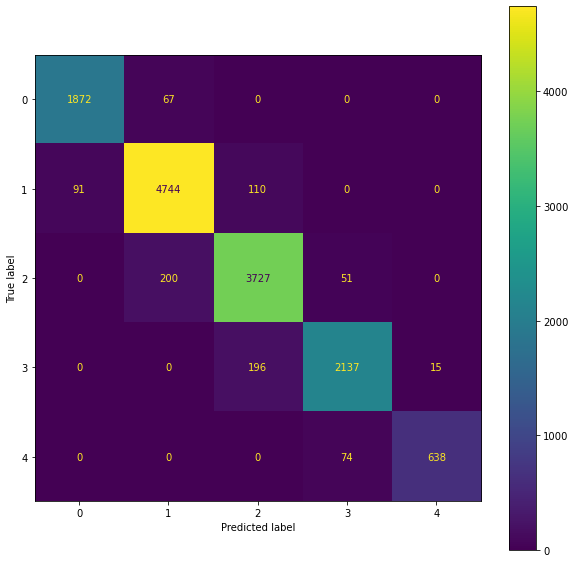

In [97]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

Decision Tree

Accuracy: 0.823
F1_Score: 0.823
Recall_Score: 0.823
Precision_Score: 0.823
Cross Validation Score: 0.819
              precision    recall  f1-score   support

           0     0.8696    0.9113    0.8900      1939
           1     0.8543    0.8584    0.8564      4945
           2     0.7742    0.7755    0.7748      3978
           3     0.7915    0.7568    0.7738      2348
           4     0.8466    0.8216    0.8339       712

    accuracy                         0.8231     13922
   macro avg     0.8272    0.8247    0.8258     13922
weighted avg     0.8225    0.8231    0.8227     13922



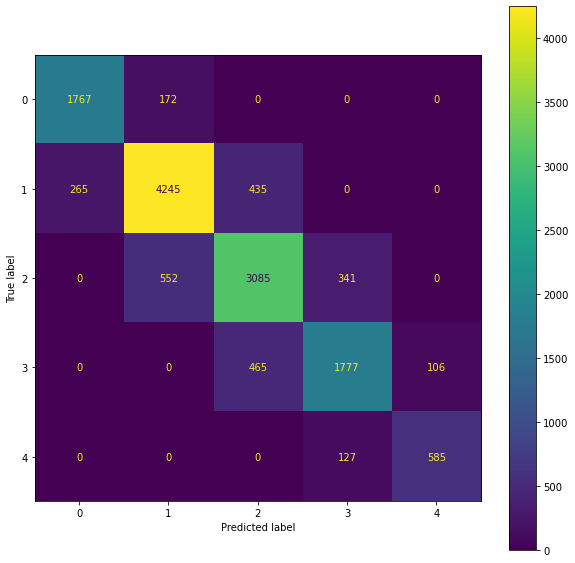

In [98]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

Gaussian Naive Bayes

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9
F1_Score: 0.9
Recall_Score: 0.9
Precision_Score: 0.901


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Cross Validation Score: 0.902
              precision    recall  f1-score   support

           0     0.8633    0.8989    0.8807      1939
           1     0.9229    0.8758    0.8987      4945
           2     0.8794    0.9346    0.9062      3978
           3     0.9208    0.9012    0.9109      2348
           4     0.9123    0.8764    0.8940       712

    accuracy                         0.9002     13922
   macro avg     0.8997    0.8974    0.8981     13922
weighted avg     0.9013    0.9002    0.9002     13922



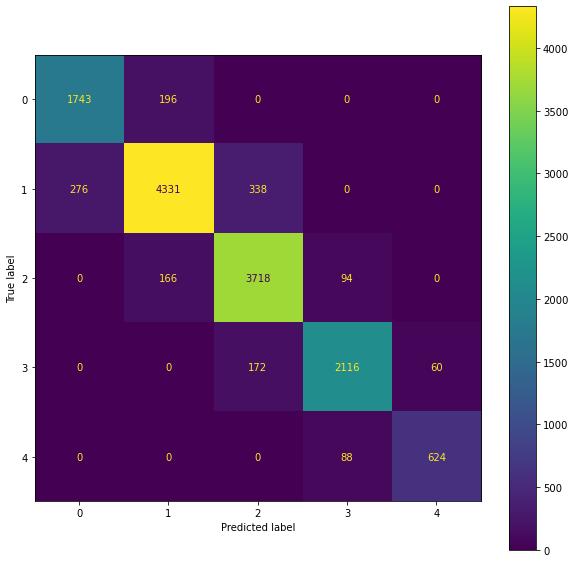

In [99]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

Nearest Neighbour

C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.916
F1_Score: 0.916
Recall_Score: 0.916
Precision_Score: 0.92


C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91897\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Cross Validation Score: 0.915
              precision    recall  f1-score   support

           0     0.8140    0.9954    0.8956      1939
           1     0.9302    0.9007    0.9152      4945
           2     0.9477    0.8977    0.9220      3978
           3     0.9525    0.8965    0.9237      2348
           4     0.8777    0.9677    0.9205       712

    accuracy                         0.9157     13922
   macro avg     0.9044    0.9316    0.9154     13922
weighted avg     0.9201    0.9157    0.9161     13922



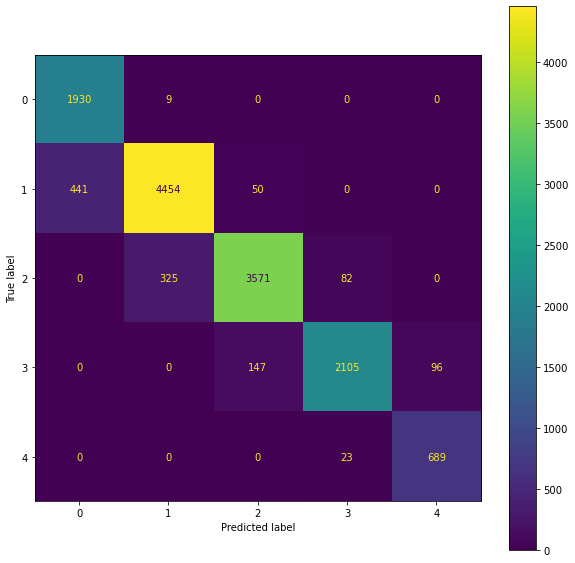

In [100]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

XG Boost

In [101]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_scaled,y_train)
predictions = xgb_classifier.predict(X_test_scaled)

print("Accuracy of Model::",accuracy_score(y_test,predictions))
print('F1_Score:',f1_score(y_test,predictions,average='weighted'))
print('Recall_Score:',recall_score(y_test,predictions,average='weighted'))
print('Precision_Score:',precision_score(y_test,predictions,average='weighted'))

Accuracy_xg = accuracy_score(y_test,predictions)


Accuracy of Model:: 0.9686826605372791
F1_Score: 0.9686376135167606
Recall_Score: 0.9686826605372791
Precision_Score: 0.9686353233018936


In [102]:
classifier=['Random Forest', 'Decision Trees', 'Gaussian Naive Bayes', 'Nearest Neighbour', 'XG Boost']
accuracy=[Acc_ran,Acc_dt,Acc_gb,Acc_knn,Accuracy_xg]
df2 = pd.DataFrame(classifier, columns=['Classifier'])
df2['accuracy']=accuracy

In [104]:
classifier=['Random Forest', 'Decision Trees', 'Gaussian Naive Bayes', 'Nearest Neighbour', 'XG Boost']
accuracy=[Acc_ran,Acc_dt,Acc_gb,Acc_knn,Accuracy_xg]
df3 = pd.DataFrame(classifier, columns=['Classifier'])
df3['accuracy']=accuracy

<AxesSubplot:xlabel='accuracy', ylabel='Classifier'>

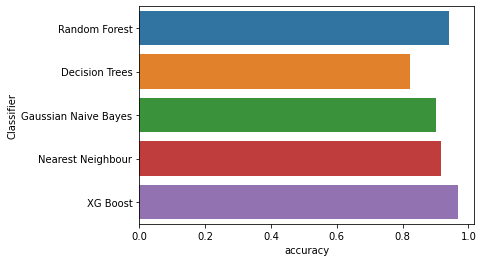

In [105]:
sns.barplot(y = 'Classifier',
            x = 'accuracy',
            data = df3,orient='h')